
# Bayesian Deep Learning for Financial Markets
> The case for a Bayesian framework to fit flexible models with noisy data.

- toc: true 
- badges: true
- comments: true
- categories: [bayesian, deep learning]


We want to estimate the posterior predictive distribution of asset returns $y$ given features $x$ and training data $\mathcal{D}$ $$p(y \mid x, \mathcal{D})=\int p(y \mid x, w) p(w \mid \mathcal{D}) d w.$$
 
In the Bayesian framework, we use probability theory to reason about models. We are honest about the uncertainty we have about the models and their parameters and avoid picking any single one. Instead, we ensemble models and parameters, weighting by their posterior probability distribution -- *marginalization instead of optimization*. The posterior is given by Bayes' Theorem:
 
$$p\left(w \mid \mathcal{D} \right)=\frac{p\left(\mathcal{D} \mid w\right) p(w)}{\int p\left(\mathcal{D} \mid w\right) p(\theta) d \theta}.$$

There are several different ways to compute or approximate this posterior. The Bayesian framework is much more than any specific algorithm, though. Its distinguishing feature is the use of *probability distributions instead of point estimates*. Any model can be viewed through a Bayesian lens.
 




In the case of infinite iid data, Bayesian and frequentist methods yield the same result. Then the posterior is the Dirac delta function with infinite density at the maximum likelihood estimate. The number of observations may be a misleading measure to assess whether one is 'near' this ideal case. It is important to distinguish tall and wide data regimes. In a tall data regime, we have lots of independent training examples from the same distribution. Wide data regimes, on the other hand, may also have many training examples but they are not independent of each other and require a more complex model. 

Financial data is exceptionally noisy and structurally complex. In addition, uncertainty estimates are critically important for the decision-making process. These are exactly the conditions where a Bayesian framework is most advantageous. In the following, I’ll detail some of the advantages a Bayesian framework brings to the modeling of financial data.



# Quantification of epistemic uncertainty


- The ultimate goal of financial forecasting is to make profitable decisions.
- For optimal decisions we need to account for uncertainty, this is embodied in the common mean-variance optimization approach due to Markowitz (1952). 
- However, mean-variance portfolio optimization based on maximum likelihood estimates neglects epistemic uncertainty.
- Instead, use the empirical mean and variance of the posterior predictive distribution.
- Even more generally, maximize utility:
$\max _{\omega} \mathrm{E}\left[U\left(\boldsymbol{\omega}^{\prime} \mathbf{r}_{T+1}\right)\right]=\max _{\omega} \int U\left(\boldsymbol{\omega}^{\prime} \mathbf{r}_{T+1}\right) p\left(\mathbf{r}_{T+1} \mid \mathcal{D}\right) \mathrm{d} \mathbf{r}_{T+1}$
subject to $\boldsymbol{\omega}^{\prime} \mathbf{1}=1$.
- Allows for custom utility functions and non-normality (skew, kurtosis).
- [Portfolio Optimization within a Bayesian Framework](https://jpwoeltjen.github.io/researchBlog/probabilistic%20programming/bayesian/portfolio%20optimization/2020/10/01/bayesian_porfolio_optimization.html).

- Epistemic uncertainty is the uncertainty about the model -- uncertainty which can be explained away given enough data. By quantifying it we:
 
   - Naturally adjust for parameter uncertainty of different models and/or assets (due to unequal amounts of data or otherwise weaker evidence).
   - Naturally downscale portfolio allocations when a new data point is far away from training data (e.g. data anomalies, financial crises, regime shifts).

   - [On the Uncertainty Quantification of Deep Neural Networks](https://jpwoeltjen.github.io/researchBlog/bayesian/deep%20learning/2020/11/04/bayesian_uncertainty.html).


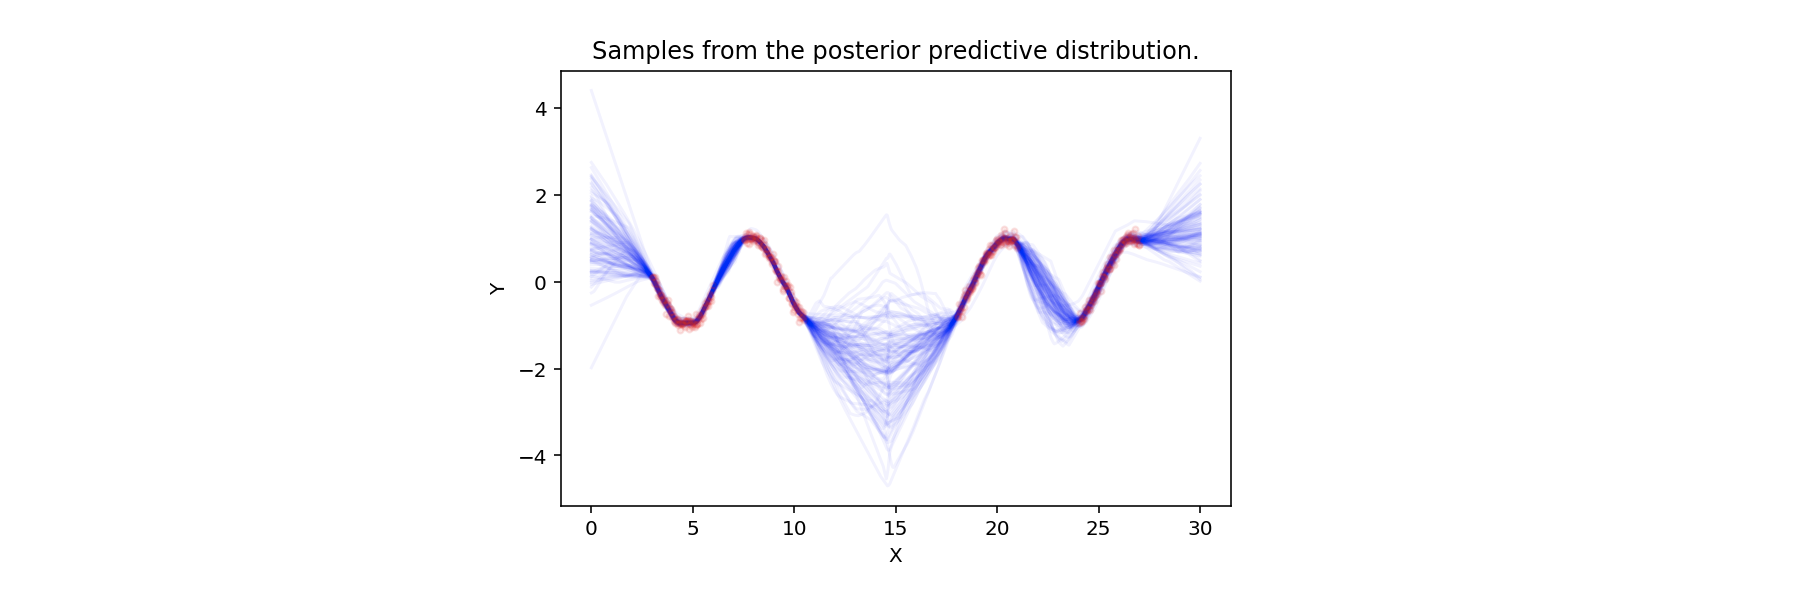

# Better generalization  

## Architecture selection
 - Consider neural networks as non-parametric models (i.e. having infinitely many parameters).
 - The number of parameters should not be used as a measure of complexity.
 - Instead, consider the model's support (which solutions are a priori possible) and inductive bias (which solutions are a priori likely).
 - A Bayesian model uses a parameter if and only if there is sufficient evidence for its usefulness.


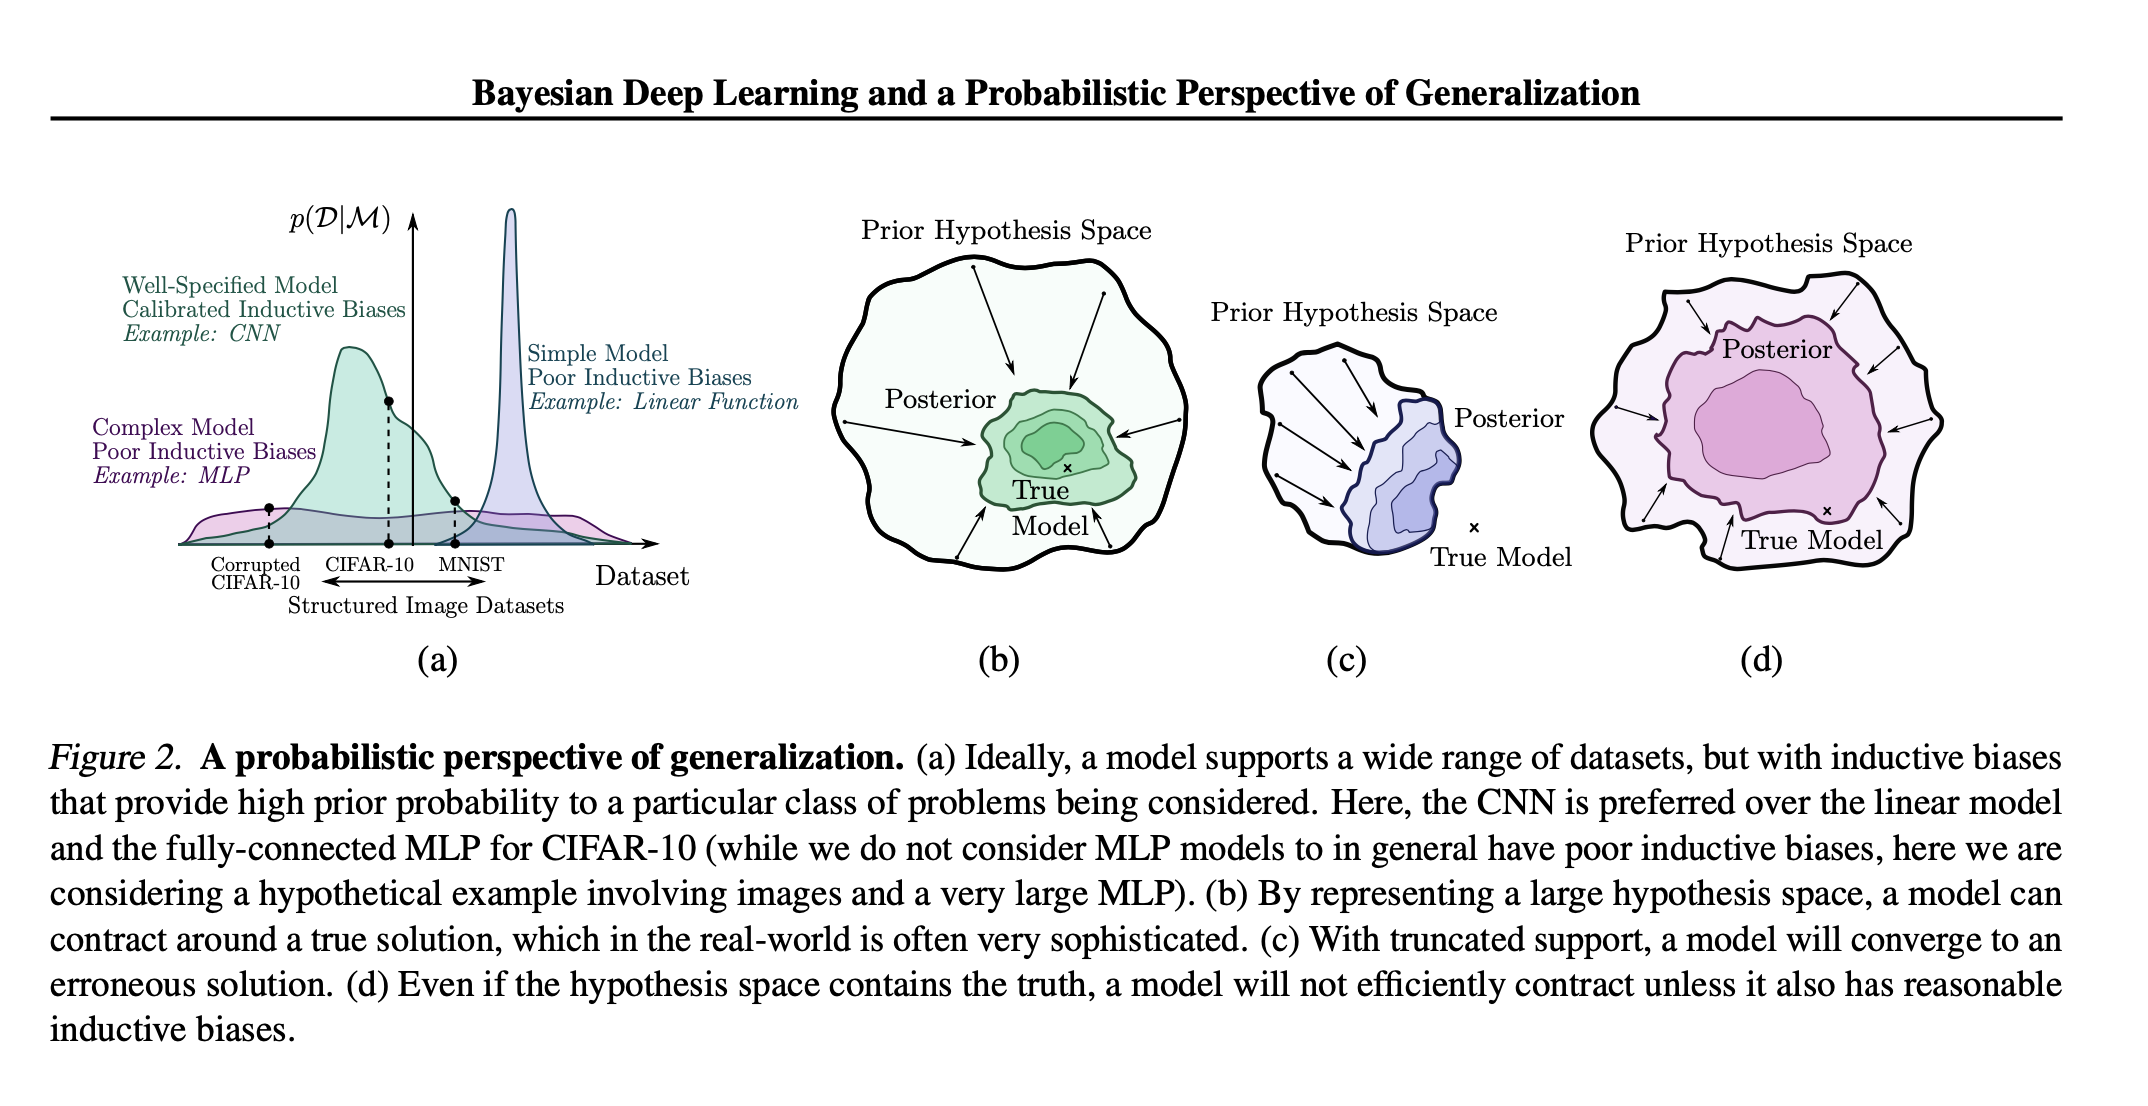

Wilson, Andrew Gordon, and Pavel Izmailov. "Bayesian deep learning and a probabilistic perspective of generalization." arXiv preprint arXiv:2002.08791 (2020).

## Model comparison and ensembling with Bayesian Occam's Razor
- The “Bayesian way” to compare models is to compute the marginal likelihood of each model $p\left(y \mid \mathcal{M}_{k}\right),$ i.e. the probability of the observed data $y$ given the model $\mathcal{M}_{k}$.
- Then by Bayes' theorem: $p\left(\mathcal{M}_{k} \mid y\right) \propto p\left(y \mid \mathcal{M}_{k}\right) p\left(\mathcal{M}_{k}\right)$
- Bayesian factor compares two models with equal model priors and cancels the intractable evidence term $B F=\frac{p\left(y \mid \mathcal{M}_{0}\right)}{p\left(y \mid \mathcal{M}_{1}\right)}$
- Bayesian model averaging doesn't select single model but computes average weighted with each model's *marginal posterior*: $$p(\theta \mid y)=\sum_{k=1}^{K} p\left(\theta \mid y, \mathcal{M}_{k}\right) p\left(\mathcal{M}_{k} \mid y\right)$$
- Bayesian Occam's Razor: the more parameters (with positive probability), the more the prior is spread over parameters (remember: it must integrate to 1) and the more unlikely the model becomes.
- Problem: very sensitive to prior and hard to compute.
 
- Randomly initialized neural networks find different but equally performing local optima. A Bayesian model average is hence especially desirable for neural networks.
 
- Eliminates double descent (more parameters increase performance monotonically)
 .
  
 




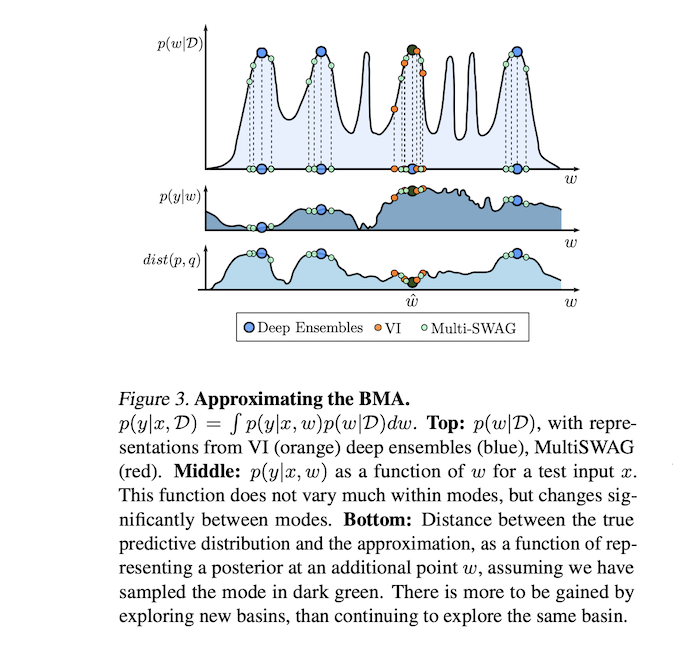

Wilson, Andrew Gordon, and Pavel Izmailov. "Bayesian deep learning and a probabilistic perspective of generalization." arXiv preprint arXiv:2002.08791 (2020).

## Bayesian weight decay and automatic relevance determination

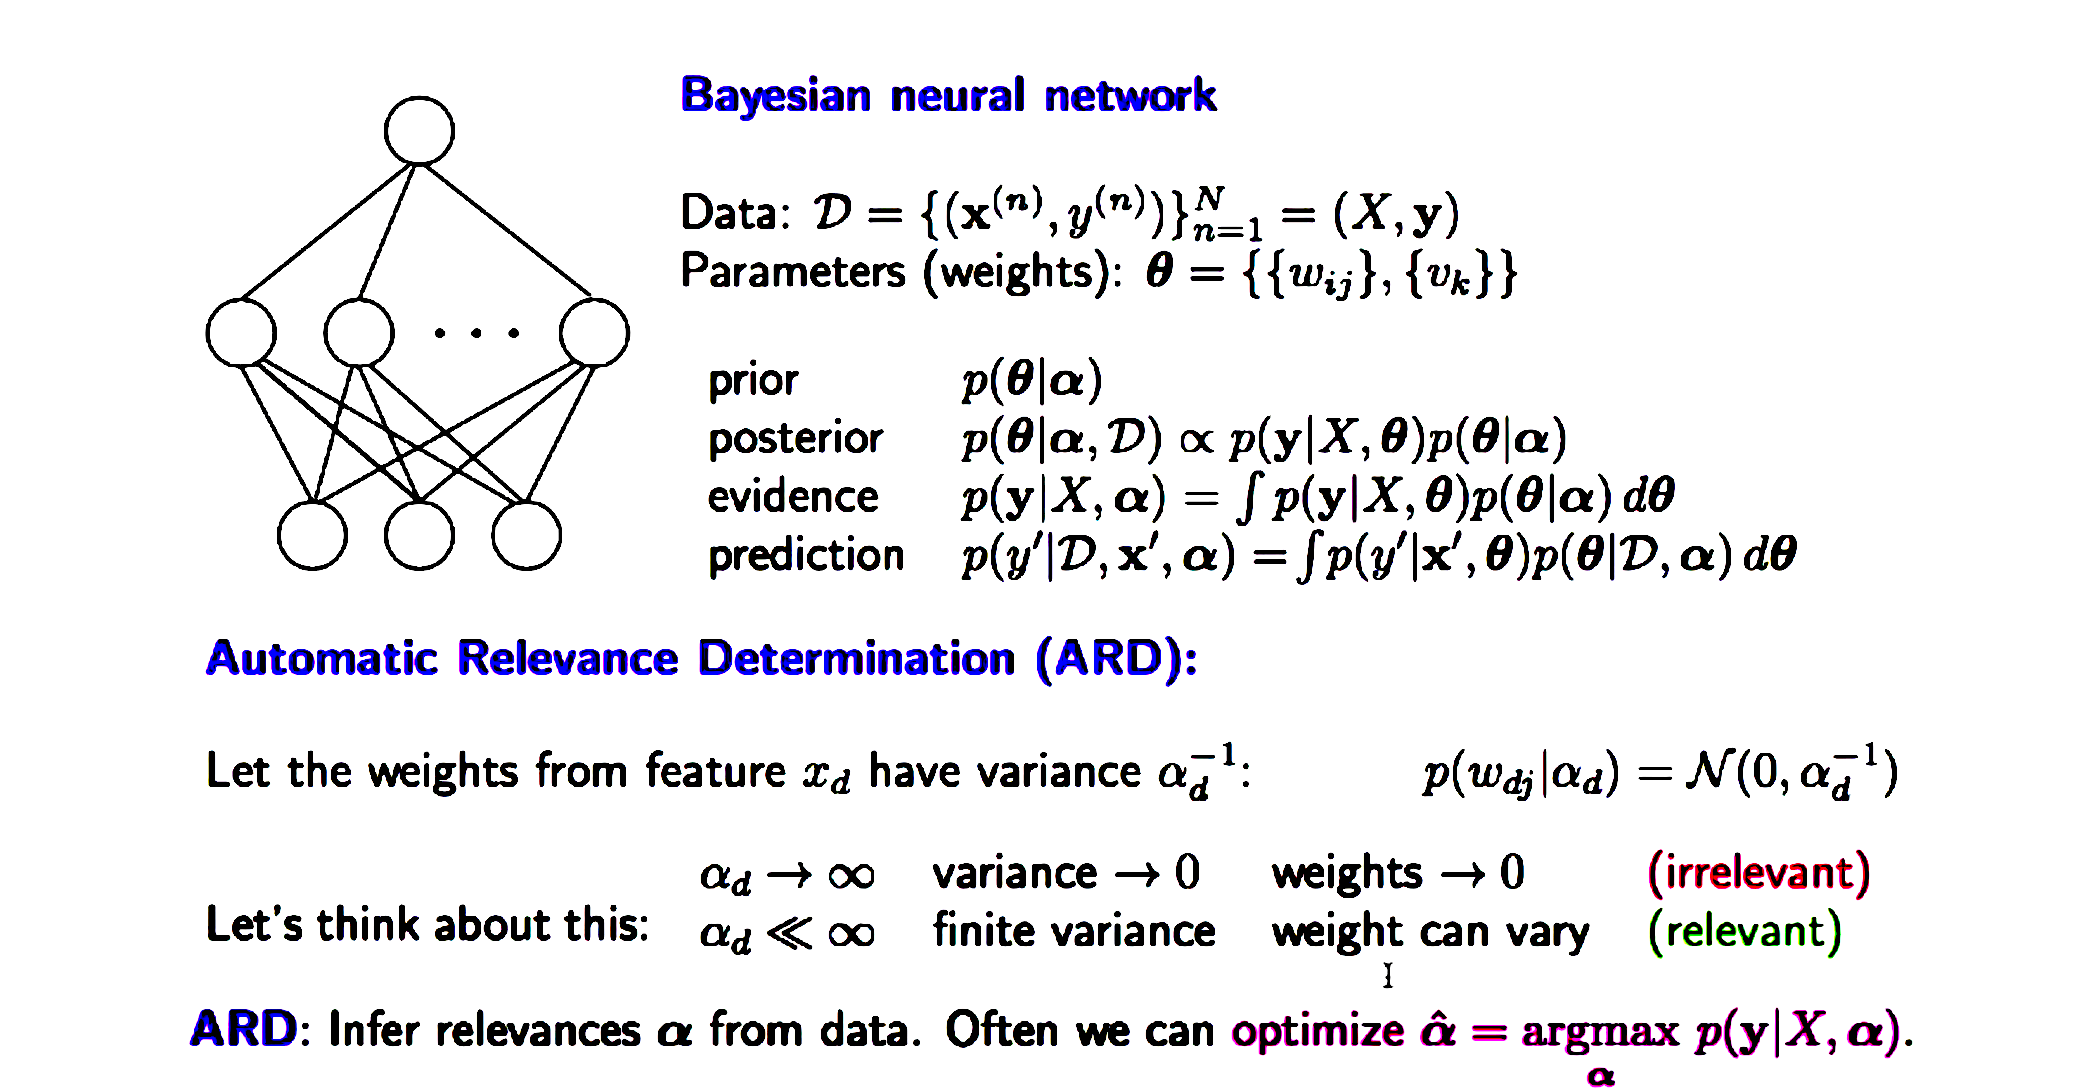

Source: Zoubin Ghahramani (University of Cambridge) Bayesian Deep Learning Workshop "History of Bayesian Neural Networks (Keynote talk)" https://www.youtube.com/watch?v=FD8l2vPU5FY&feature=youtu.be

We want the model to automatically exclude features that aren't relevant and the predictions should be smooth. This helps generalization and also reduces transaction costs.

- [Bayesian Regularization of Deep Neural Networks
](https://jpwoeltjen.github.io/researchBlog/bayesian/deep%20learning/feature%20selection/2020/11/09/bayesian_regularization.html)

# Adaptiveness



1. Change point estimation.
2. Random walk priors.
  - non-stationary data.
  - [Adaptive Bayesian Neural Network Based on Random Walk Priors](https://jpwoeltjen.github.io/researchBlog/efficiency/time%20series/deep%20learning/2020/08/28/random_walk_deep_net_reg.html).
3. Optimal updating.
  - $p\left(\theta \mid \mathcal{D}_{1}\right)=\frac{p\left(\mathcal{D}_{1} \mid \theta\right) p(\theta)}{\int p\left(\mathcal{D}_{1} \mid \theta\right) p(\theta) d \theta}$.
  - Set the prior to the previous posterior and recompute:
$p\left(\theta \mid \mathcal{D}_{2}, \mathcal{D}_{1}\right)=\frac{p\left(\mathcal{D}_{2} \mid \theta\right) p\left(\theta \mid \mathcal{D}_{1}\right)}{\int p\left(\mathcal{D}_{2} \mid \theta\right) p\left(\theta \mid \mathcal{D}_{1}\right) d \theta}$.

# Flexibility


 
- Non-normality.
- Heteroskedasticity.
- Encode domain expertise via priors and other inductive biases.
  - [Hierarchical Bayesian Neural Network for Efficient High-dimensional Asset Return Prediction.](https://jpwoeltjen.github.io/researchBlog/efficiency/hierarchical/deep%20learning/probabilistic%20programming/bayesian/panel/2020/08/28/hierarchical_bayesian_neural_network.html)
- Glueing together different components
 - Specify scale parameter of likelihood function via MV-GARCH or stochastic volatility models.
 - [Efficient Estimation of Predictive Models using High-frequency High-dimensional Data](https://jpwoeltjen.github.io/researchBlog/efficiency/deep%20learning/time%20series/panel/2020/08/10/Efficient_estimation_of_predictive_models-using_high-frequency_high-dimensional_data.html).
 

